Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name, email and UFID.
Please do not modify instruction cells or any cells with automated tests (marked with `[ASSERTS]`). Note: you can add new cells if you need them, but answers must be in the cells with `YOUR CODE HERE` or "YOUR ANSWER HERE" comments.

---

## Homework 3: Gradient Descent & Unsupervised Learning

## Preamble: Write your Name, Email and UFID

In [1]:
NAME = 'Hansika Weerasena'
EMAIL = 'hansikam.lokukat@ufl.edu'
UFID = 11639514

# YOUR CODE HERE
# raise NotImplementedError()

print('Homework 3 -- name: {}, email: {}, UFID: {}\n'.format(NAME, EMAIL, UFID))

Homework 3 -- name: Hansika Weerasena, email: hansikam.lokukat@ufl.edu, UFID: 11639514



In [2]:
""" [ASSERTS] Check that your name, email, and UFID is filled in."""
assert NAME != '' and NAME != 'Your name here.' and len(NAME) > 3
assert EMAIL != '' and EMAIL != 'Your email here.' and len(EMAIL) > 7
assert type(UFID) == int and UFID != 12345678 and UFID >= 10000000 and UFID <= 99999999

## Academic Integrity

### <span style="color:red;">This is an individual assignment. Academic integrity violations (i.e., cheating, plagiarism) will be reported to SCCR!</span><br/>
#### The official CISE policy recommended for such offenses is a course grade of E. Additional sanctions may be imposed by SCCR such as marks on your permanent educational transcripts, dismissal or expulsion.
#### Reminder of the Honor Pledge: On all work submitted for credit by Students at the University of Florida, the following pledge is either required or implied: *"On my honor, I have neither given nor received unauthorized aid in doing this assignment."*

#### Acknowledgement: Do you acknowledge and understand the academic integrity warning above? 

In [3]:
academic_integrity_acknowledgement = True
# YOUR CODE HERE
# raise NotImplementedError()

In [4]:
""" [ASSERTS] Check that you acknowledge the academic integrity warning, you understand it and have been reminded of the UF Honor Pledge."""
assert academic_integrity_acknowledgement

### We will use the Bike Sharing dataset (hourly). A version of this dataset is included in the homework handout archive.
### This dataset contains features of users bike sharing/rental on an hourly basis.
### The task is to predict how many users are sharing/renting a bike.
### In this task you will load the data and preprocess it.

#### The following cell's code (import statements etc.) is provided for you and you should not need to change it.

In [5]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

/var/folders/z6/5n_s73l16t753clskkrk3n180000gq/T/ipykernel_78784/1989827619.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


------------
### Python version: 3.9.6 (default, Nov 10 2023, 13:38:27) 
[Clang 15.0.0 (clang-1500.1.0.2.5)]
### NumPy version: 1.26.3
### Scikit-learn version: 1.4.0
------------


#### This is the seed we will use, do not change it.

In [6]:
# set the seed
seed = 42
np.random.seed(seed)

prop_vec = [16, 2, 2] # proportions for train - val - test splits

epsf = 1e-9 # small epsilon value for floating point comparisons

In [7]:
""" [ASSERTS] Check seed. """
assert seed == 42

### Loading data (set the path correctly so it runs on your machine --- don't submit the data file with your notebook).
#### Note: this dataset has missing values (artificially introduced), which you'll need to fill in before you can train a model

In [8]:
"""Fill in the path to the directory where 'bikesharehour.csv.gz' is located.
"""
data_root = './data' #put the path here
# YOUR CODE HERE
# raise NotImplementedError()

In [9]:

dataset_fp = os.path.join(data_root, 'bikesharehour.csv.gz')
assert os.path.exists(dataset_fp), 'Dataset not found ({})!'.format(dataset_fp)
df = pd.read_csv(dataset_fp, compression='gzip', header=0, na_values='?')

# Check that we loaded the data as expected
df_expected_shape = (17379, 15)
assert df.shape == df_expected_shape, 'Unexpected shape of df!'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      16320 non-null  float64
 1   year        16231 non-null  float64
 2   month       16304 non-null  float64
 3   hour        16254 non-null  float64
 4   holiday     16277 non-null  float64
 5   weekday     16282 non-null  float64
 6   workingday  16297 non-null  float64
 7   weathersit  16324 non-null  float64
 8   temp        16242 non-null  float64
 9   atemp       16271 non-null  float64
 10  hum         16252 non-null  float64
 11  windspeed   16281 non-null  float64
 12  registered  16244 non-null  float64
 13  nsqrtc      16263 non-null  float64
 14  count       17379 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 2.0 MB


### The following code will pre-process the dataset (no need to modify this).

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# grabing stuff and pre-processing 
all_xy = df.to_numpy() # grab all the data as a numpy matrix

col_names = [c for c in df.columns]
features = col_names[:-1]
target = col_names[-1]
print('features: {} --- target: {}'.format(features, target))

# split into x and y
all_x_nan = all_xy[:,:-1]
all_y = all_xy[:,-1]

# rescale y to be within [0,100]
y_scale = 100.0
min_y = np.amin(all_y)
max_y = np.amax(all_y)
all_y = y_scale * (all_y - min_y)/(max_y - min_y)

mf_imputer = SimpleImputer(missing_values=np.nan, strategy='median', copy=True)

all_x_mf = mf_imputer.fit_transform(all_x_nan)
all_x = all_x_mf

# check that the shape is correct
assert all_x.shape == (17379, 14)

# check that there are no more NaNs
assert np.sum(np.sum(np.isnan(all_x), axis=0)) == 0

features: ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'nsqrtc'] --- target: count


### We will create two splits of the data in train-test-val one with standardized features the other without (unscaled features)

In [11]:
# unscaled --- split the data into train, test, val
train_prop = 1.0 - prop_vec[0] / np.sum(prop_vec)
train_x_unscaled, tmp_x_unscaled, train_y_unscaled, tmp_y_unscaled = train_test_split(all_x, all_y, test_size=train_prop, random_state=seed)

val_prop = 1.0 - prop_vec[1] / np.sum(prop_vec[1:])
val_x_unscaled, test_x_unscaled, val_y_unscaled, test_y_unscaled = train_test_split(tmp_x_unscaled, tmp_y_unscaled, test_size=val_prop, random_state=seed)


# rescaled features (default)
scaler = StandardScaler(copy=True) # z-score normalize the features
scaled_all_x = scaler.fit_transform(all_x) 

# split the data into train, test, val
train_prop = 1.0 - prop_vec[0] / np.sum(prop_vec)
train_x, tmp_x, train_y, tmp_y = train_test_split(scaled_all_x, all_y, test_size=train_prop, random_state=seed)

val_prop = 1.0 - prop_vec[1] / np.sum(prop_vec[1:])
val_x, test_x, val_y, test_y = train_test_split(tmp_x, tmp_y, test_size=val_prop, random_state=seed)

# sanity check shapes
train_x.shape, train_y.shape, test_x.shape, test_y.shape, val_x.shape, val_y.shape
assert train_x.shape == (13903, 14) and train_y.shape == (13903,) and test_x.shape == (1738, 14) and test_y.shape == (1738,)

assert train_x.shape == train_x_unscaled.shape and val_x.shape == val_x_unscaled.shape and np.all(np.abs(train_y - train_y_unscaled) <= 1e-6)

---
# [Task 1] (35 points) Gradient Descent

### Let's train a linear regression model that we can use as a point of comparison later.

In [12]:
from sklearn.linear_model import LinearRegression

lrmodel = LinearRegression().fit(train_x, train_y)

### [Task 1] Over the next few cells you will fill in code to implement what we need for a training loop with gradient descent. 
### The version of gradient descent we will implement is fairly generic in that it can capture batch gradient descent, stochastic gradient descent, and mini-batch SGD.  However, as a result of the flexibility it offers it has many components which you have to implement correctly. So you should read the provided code skeleton and think carefully of how the entire training loop works.

## [Task 1a] (5 points) Fill in the code for the function predict_linear(). It takes a vector of parameters theta and a feature matrix X. The prediction is computed as w x + b.

In [13]:
"""Fill in your code in the function (~1 line)
"""
# given model parameters 'theta' and a feature matrix 'X', return predictions (for a linear model)
def predict_linear(theta, X):
    b = theta[0]
    w = theta[1:]
    
    assert w.shape[0] == X.shape[1]

    # YOUR CODE HERE

    pred_y = X.dot(w) + b
    
    # raise NotImplementedError()
    
    assert pred_y.shape == (X.shape[0],)
    return pred_y

In [14]:
""" [ASSERTS] Check 1a completed. """

assert var_exists('predict_linear')
tmp_X_ = np.random.randint(low=0, high=10, size=(7,4))
tmp_theta_ = np.random.uniform(size=(5,))
out = predict_linear(tmp_theta_, tmp_X_)

assert out.shape == (7,)


### The following code is provided and we will use to evaluate the models we train. (You do not need to modify it.)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def r2_mse_mae_eval(model_theta, tr_x, tr_y, v_x, v_y, predict_fn=predict_linear, pref='', verb=True):
    # predictions
    train_pred = predict_fn(model_theta, tr_x)
    val_pred = predict_fn(model_theta, v_x)
    
    # R^2 the coefficient of determination
    train_r2 = r2_score(tr_y, train_pred)
    val_r2 = r2_score(v_y, val_pred)
    
    if verb:
        print('{}Train R^2: {:.3f}, Val  R^2: {:.3f}'.format(pref, train_r2, val_r2))

    # measure the error (MSE) wrt true target
    train_mse = mean_squared_error(tr_y, train_pred)
    val_mse = mean_squared_error(v_y, val_pred)
    if verb:
        print('{}Train MSE: {:.3f}, Val MSE: {:.3f}'.format(pref, train_mse, val_mse))

    train_mae = mean_absolute_error(tr_y, train_pred)
    val_mae = mean_absolute_error(v_y, val_pred)

    if verb:
        print('{}Train MAE: {:.3f}, Val MAE: {:.3f}'.format(pref, train_mae, val_mae))

    return train_r2, val_r2, train_mse, val_mse, train_mae, val_mae

## [Task 1b] (10 points) Fill in the code for generic_partition_shuffle_sgd(). Read the code of the function carefully and try to understand how it works before you fill in the code.

#### The function below takes training data (X, y) and performs gradient descent for 'num_epochs' using batches of size 'batch_size'. Most important are the following arguments:
#### - model_fns_tup is a tuple consisting of three functions for prediction, evaluating the loss, and computing the gradients.
#### - init_params_fn is a function to initialize the parameter vector theta
#### - lr_schedule_fn is a function to calculate the learning rate based on the epoch (learning rate schedule)

In [16]:
"""Fill in your code in the function (~3-4 lines). Your code should grab each batch as (mb_X, mb_y) based on the shuffled data. 
You can ignore the part about clipping gradients for now (will be revisited in a later task).
"""
def generic_partition_shuffle_sgd(X, y, model_fns_tup, init_params_fn, lr_schedule_fn, num_params=None, val_data=None, clip_gradient=False, 
                                  num_epochs=1000, batch_size=100, stop_tol=1e-10, verbose=False, verb_freq=0):
    (n, m) = X.shape
    assert n == y.shape[0]

    if verb_freq < 1:
        verb_freq = int(np.ceil(num_epochs/5))

    # enforce meaningful batch size
    assert batch_size == int(batch_size)
    if batch_size < 1:
        batch_size = 1
    elif batch_size > n:
        batch_size = n

    if num_params == None:
        num_params = m
        
    theta = init_params_fn(num_params) # initialize the model parameters

    # check the functions
    assert model_fns_tup != None and type(model_fns_tup) == tuple and len(model_fns_tup) == 3
    predict_fn, loss_fn, gradient_fn = model_fns_tup

    assert lr_schedule_fn != None # learning schedule

    if val_data != None:
        val_X, val_y = val_data

    num_batches = int(np.ceil(n/batch_size))

    train_loss = np.zeros((num_epochs, num_batches))
    val_loss = np.zeros((num_epochs,))

    loss_ma = None
    for epoch in range(0, num_epochs):           
        prev_theta = theta

        # shuffle the data
        pi = np.random.permutation(n)
        shuf_X = X[pi,:]
        shuf_y = y[pi]

        # compute learning rate
        eta = lr_schedule_fn(epoch) 
        assert eta > 0, 'Learning rate must be positive.'
        
        # inner loop over batches
        for batch_start in range(0, n, batch_size):
            
            batch_idx = batch_start // batch_size
            iteration_idx = epoch * num_batches + batch_idx
            
            # YOUR CODE HERE
            batch_end = min(batch_start + batch_size, n)
            mb_X = shuf_X[batch_start:batch_end, :]
            mb_y = shuf_y[batch_start:batch_end,].reshape(-1,1)
            # raise NotImplementedError()
            assert mb_X.shape[0] == mb_y.shape[0]
            
            gradient = gradient_fn(theta, mb_X, mb_y) # calculate the gradient vector
            assert gradient.shape == theta.shape  

            if clip_gradient:
                # L2-norm clip the gradient
                # YOUR CODE HERE
                grad_norm = np.linalg.norm(gradient)
                gradient = gradient / grad_norm
                #raise NotImplementedError()

            # update theta (this is the actual gradient descent step)
            theta = theta - eta * gradient

            # compute the loss(es)
            train_lossval = loss_fn(theta, mb_X, mb_y)
            train_loss[epoch, batch_idx] = train_lossval

            # compute diff in theta from previous iteration
            diff = theta - prev_theta
            l2ndiff = np.linalg.norm(diff)

            if verbose and np.mod(iteration_idx, verb_freq) == 0:
                loss_ma = 0.5 * loss_ma + 0.5 * train_lossval if loss_ma is not None else train_lossval
                print('[Iter {} (epoch {})] train loss: {:.2f}, lr: {:.9f}, theta diff (l2-norm): {:.9f}.'.format(iteration_idx, epoch, loss_ma, eta, l2ndiff))

        # validation loss, once per epoch
        val_lossval = loss_fn(theta, val_X, val_y) if val_data != None else None
        if val_lossval != None:
            val_loss[epoch] = val_lossval

        
        if l2ndiff < stop_tol: # do we stop?
            if verbose:
                print('Stop condition reached (epoch: {} -- l2ndiff: {}).'.format(epoch, l2ndiff))
            break
            
    train_loss = np.array(train_loss)
    val_loss = np.array(val_loss) if len(val_loss) > 0 else None
    ret_dc = {'theta': theta.reshape(-1,), 'train_loss': train_loss, 'val_loss': val_loss, 'last_epoch': epoch, 'num_batches': num_batches, 'l2ndiff': l2ndiff, 'mb_X_shape': mb_X.shape, 'gradient': gradient}
    
    return ret_dc

In [17]:
""" [ASSERTS] Check 1b completed. """

assert var_exists('generic_partition_shuffle_sgd')


## [Task 1c] (10 points) Fill in the code for the following functions for parameter initialization and learning rate scheduling.

#### - constant_lr_schedule() should always return the learning rate eta.
#### - random_uniform_init() should return a parameter vector of shape (m,1) uniformly random between low and high.
#### - zero_init() should return a parameter vector of shape (m,1) all zeros.

In [18]:
"""Fill in your code below (~1 line for each function).
"""

# this learning rate schedule is provided as an example
def log1p_decay_lr_schedule(eta, epoch):
    return eta / (1.0 + np.log1p(epoch))

# this is a constant schedule, it should always return the learning rate eta (regardless of epoch)
def constant_lr_schedule(eta, epoch):
    # YOUR CODE HERE
    return eta
    #raise NotImplementedError()

def random_uniform_init(m, low=-1.0, high=1.0):
    # YOUR CODE HERE
    return np.random.uniform(low, high, (m, 1))
    #raise NotImplementedError()

def zero_init(m):
    # YOUR CODE HERE
     return np.zeros((m, 1))
    #raise NotImplementedError()

In [19]:
""" [ASSERTS] Check 1c completed. """

assert var_exists('constant_lr_schedule') and var_exists('random_uniform_init') and var_exists('zero_init')

assert constant_lr_schedule(10, 0) == constant_lr_schedule(10, 3) and constant_lr_schedule(10, 17) == 10
assert np.all(np.abs(zero_init(10)) < epsf)


## [Task 1d] (10 points) Now let's implement the loss function and gradient computation function. Fill in the code below.
### - loss_mse() needs to calculate the MSE loss value on (X,y) given the linear model described by 'theta'.
### - gradient_mse() needs to compute the gradient of the MSE loss with respect to the parameters 'theta'. You may want to look at the course slides to help you figure out the gradient.
### Note: while it may be tempting to use predict_linear() (and it is possible to get this to work with some effort) the code is set up to include a constant feature for the bias so the loss and gradients are easier to compute. So it will be easier to avoid predict_linear() in your implementation.
### Your implementation must calculate the gradient vector manually, you should *not* use automatic differentiation such as provided by Tensorflow / GradientTape.

In [20]:
"""Fill in your code (~3-4 lines for each)
"""
def loss_mse(theta, X, y):
    (n, m) = X.shape
    
    # YOUR CODE HERE
    y = y.reshape(-1,1)
    error = X.dot(theta) - y
    loss_val = ((1/n) * np.dot(error.T, error)).squeeze()
    #raise NotImplementedError()
    
    assert loss_val.shape == ()
    return loss_val

### For this you'll want to go back to the course slides or spend some time figuring out the gradient of MSE 
### (the loss) with respect to the parameters (i.e., theta which includes the weights vector w and bias b)
### Note: asserts are there to help you ensure that things have the right shape. 
def gradient_mse(theta, X, y):
    (n, m) = X.shape

    #y = y.reshape(-1,1)
    assert y.shape == (n,1)
    assert theta.shape == (m,1)

    ### Recall that the gradient of MSE is: 2/n X^T (θ X - y)   (note: θ = theta)
    # YOUR CODE HERE
    error = X.dot(theta) - y
    gradient_vec = (2/n) * X.T.dot(error)
    # raise NotImplementedError()

    return gradient_vec

In [21]:
""" [ASSERTS] Check 1d completed. """

assert var_exists('loss_mse') and var_exists('gradient_mse')
tmp_X_ = np.random.randint(low=1, high=10, size=(7,5))
tmp_y_ = np.ones((7,1))
tmp_theta_ = np.zeros((5,1))

tmp_loss_val_ = loss_mse(tmp_theta_, tmp_X_, tmp_y_)
assert np.abs(tmp_loss_val_ - 1.0) < epsf

tmp_gv_ = gradient_mse(tmp_theta_, tmp_X_, tmp_y_)
print(tmp_gv_.shape, tmp_theta_.shape)
assert tmp_gv_.shape == tmp_theta_.shape and np.all(tmp_gv_ < 0)

sum_tmp_gv_ = np.sum(tmp_gv_)
tmp_X_ = np.random.randint(low=1, high=10, size=(70,5))
tmp_y_ = np.ones((70,1))
tmp_gv_ = gradient_mse(tmp_theta_, tmp_X_, tmp_y_)
print(tmp_gv_.shape, tmp_theta_.shape)
assert tmp_gv_.shape == tmp_theta_.shape and np.all(tmp_gv_ < 0)
sum_tmp_gv_2 = np.sum(tmp_gv_)

assert np.abs(sum_tmp_gv_2) < 2*np.abs(sum_tmp_gv_)


(5, 1) (5, 1)
(5, 1) (5, 1)


---
# [Task 2] (25 points) Training a Linear Regression Model with Gradient Descent

### We will use the following plotting function to explore the loss during training (you do not need to modify it).

In [22]:
def plot_gd_data(m_dc, xlim=None, ylim=None, plot_var=True, figsize=(9,5)):
    plt.figure(figsize=figsize)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    train_loss = m_dc['train_loss']
    val_loss = m_dc['val_loss'] 
    num_epochs = m_dc['last_epoch']+1
    x_arr = 1+np.arange(0, train_loss.shape[0])
    
    plt.plot(x_arr, train_loss[:,0], 'b--', linewidth=3, label='Training')

    if plot_var:
        train_loss_epoch_mean = np.mean(train_loss, axis=-1)
        train_loss_epoch_std = np.std(train_loss, axis=-1)
        z = 1.96
        lower = np.maximum(0, train_loss_epoch_mean - z * train_loss_epoch_std)
        upper = train_loss_epoch_mean + z * train_loss_epoch_std
        plt.fill_between(x_arr, lower, upper, color='b', alpha=0.3)
    
    plt.plot(x_arr, val_loss, 'r:', linewidth=3, label='Validation')

    plt.legend()
    
    if xlim is None:
        xlim = np.array([1, num_epochs])
    plt.xlim(xlim)
    
    if ylim is not None:
        plt.ylim(ylim)    
        
    plt.show()

## Now let's train the model

## [Task 2a] (5 points) Fill in the code below to train the model for 50 epochs with a batch size of 1000, a constant lr schedule and lr=0.004. Use zero_init() for initializing the parameters.

In [23]:
# add a constant feature of 1 to each row to account for the bias term
X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]

model_fns_tup = (predict_linear, loss_mse, gradient_mse) # set our functions

"""Fill in your code (1 line)
"""
# set 'init_params_fn'
# YOUR CODE HERE
init_params_fn = zero_init
# raise NotImplementedError()

# use a lambda to define the constant schedule with the learning rate baked in
learning_rate = 0.004
lr_sched_fn = lambda i: constant_lr_schedule(learning_rate, i)

# actually run the gradient descent and store the result
batch_size = 1000
model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=batch_size, 
                               verbose=True, verb_freq=np.maximum(1, 40000//batch_size))
print()

"""Fill in your code (1 line)
"""
# Use r2_mse_mae_eval to evaluate the model
r2_mse_mae_eval(model_dc['theta'], train_x, train_y, val_x, val_y, predict_fn=predict_linear, pref='', verb=True)
# YOUR CODE HERE

# raise NotImplementedError()

[Iter 0 (epoch 0)] train loss: 705.69, lr: 0.004000000, theta diff (l2-norm): 0.224040715.
[Iter 40 (epoch 2)] train loss: 529.68, lr: 0.004000000, theta diff (l2-norm): 2.088179367.
[Iter 80 (epoch 5)] train loss: 360.33, lr: 0.004000000, theta diff (l2-norm): 1.214545563.
[Iter 120 (epoch 8)] train loss: 243.48, lr: 0.004000000, theta diff (l2-norm): 0.690172873.
[Iter 160 (epoch 11)] train loss: 164.22, lr: 0.004000000, theta diff (l2-norm): 0.395073481.
[Iter 200 (epoch 14)] train loss: 115.20, lr: 0.004000000, theta diff (l2-norm): 0.201701523.
[Iter 240 (epoch 17)] train loss: 83.39, lr: 0.004000000, theta diff (l2-norm): 0.087454663.
[Iter 280 (epoch 20)] train loss: 72.01, lr: 0.004000000, theta diff (l2-norm): 0.022935595.
[Iter 320 (epoch 22)] train loss: 61.18, lr: 0.004000000, theta diff (l2-norm): 0.237491663.
[Iter 360 (epoch 25)] train loss: 56.20, lr: 0.004000000, theta diff (l2-norm): 0.156951137.
[Iter 400 (epoch 28)] train loss: 49.82, lr: 0.004000000, theta diff (l2

(0.8898190928055336,
 0.8903086780679558,
 38.403426082739145,
 38.61643337752737,
 3.5304431567386474,
 3.497086983339308)

In [24]:
""" [ASSERTS] Check 2a completed. """

assert var_exists('init_params_fn') and init_params_fn == zero_init
assert model_dc['mb_X_shape'] == (903,15)
assert model_dc['theta'].shape == (15,)


## [Task 2b] (10 points) Answer the following questions (a sentence or two in a comment is fine).
### 1. How does the model trained in 2a compare to the linear regression model 'lrmodel' trained at the start of Task 1 in terms of *performance metrics*?
### 2. How does the model trained in 2a compare to the linear regression model 'lrmodel' trained at the start of Task 1 in terms of *parameters*?
### 3. We used zero init for the initial theta values. A concern with this might be that if theta is 0 the initial gradient could be 0 and so we could get stuck unable to update parameters. Did this happen? Why or why not? (Explain your answer.)

In [25]:
""" Remove the 'raise NotImplementedError' line(s). Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## 1. Answer: The two models are similar in terms of performance metrics.
#
# YOUR CODE HERE

pred = lrmodel.predict(val_x)

mse = mean_squared_error(val_y, pred)
mae = mean_absolute_error(val_y, pred)
r2 = r2_score(val_y, pred)

print(f"Validation R^2: {r2}")
print(f"Validation MSE: {mse}")
print(f"Validation MAE: {mae}")

# raise NotImplementedError()
#
## 2. Answer: The parameters of the two models are fairly close, even though they are not identical.
#
# YOUR CODE HERE

lrmodel_params = np.hstack([lrmodel.intercept_, lrmodel.coef_.ravel()])
diff = lrmodel_params - model_dc['theta']

param_distance = np.linalg.norm(diff)

print("Parameter Distance:", param_distance)

# raise NotImplementedError()
#
## 3. Answer: 
# This did not happen. Because the gradient, depends on the difference between zero predictions and actual non-zero targets, making a non-zero gradient highly likely. This ensures that even with zero initialization, the model parameters will be updated to reduce prediction errors from the first iteration.
#
# YOUR CODE HERE
# raise NotImplementedError()

Validation R^2: 0.8905144059691833
Validation MSE: 38.54400761355877
Validation MAE: 3.4691913108970525
Parameter Distance: 0.5788886589274147


## [Task 2c] (5 points) You will now train the model with batch gradient descent (batch size = training set size) and stochastic gradient descent (batch size = 1). In each case you will train the model for 50 epochs and you will need to tune the learning rate appropriately (using a constant lr schedule) to ensure the training process is stable and the resulting model achieves similar performance as the one trained in Task 2a.  To observe the training process, you may find it useful to visualize training using plot_gd_data().
## Once you have sufficiently explored the relationship between the learning rate and behavior of training, set the variables below to their appropriate values.
### - 'bgd_lr': set this to the value of the learning rate you found for batch gradient descent
### - 'sgd_lr': set this to the value of the learning rate you found for stochastic gradient descent
### - 'lr_relationship_with_batch_size': +1 if the learning rate should increase with larger batch size, -1 if it should decrease with larger batch size, 0 if lr and batch size are independent/unrelated.

for batch size : 13903
for learning rate : 1e-05

Train R^2: -1.078, Val  R^2: -1.038
Train MSE: 724.259, Val MSE: 717.620
Train MAE: 19.404, Val MAE: 19.142


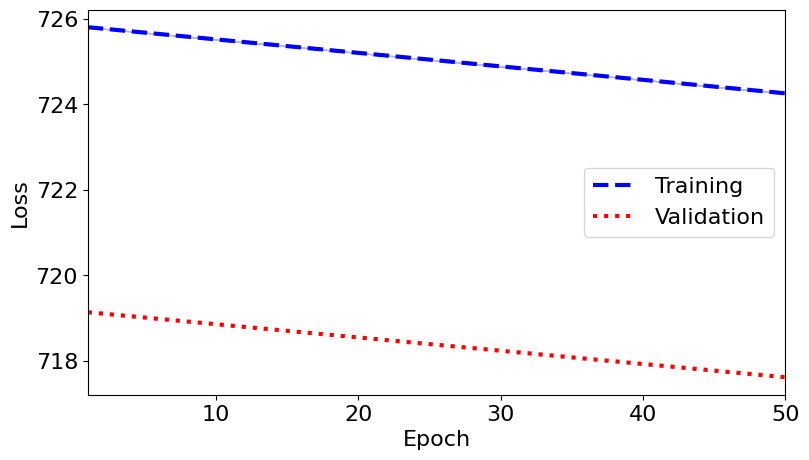

for learning rate : 5e-05

Train R^2: -1.060, Val  R^2: -1.021
Train MSE: 717.991, Val MSE: 711.457
Train MAE: 19.326, Val MAE: 19.066


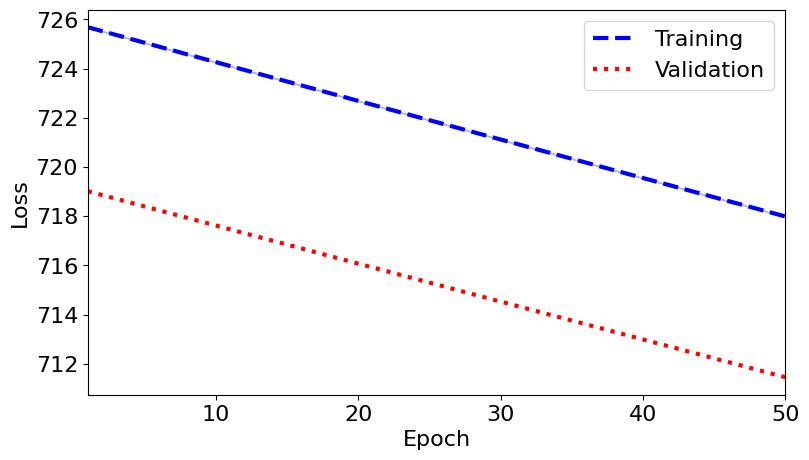

for learning rate : 0.0001

Train R^2: -1.038, Val  R^2: -0.999
Train MSE: 710.242, Val MSE: 703.838
Train MAE: 19.230, Val MAE: 18.972


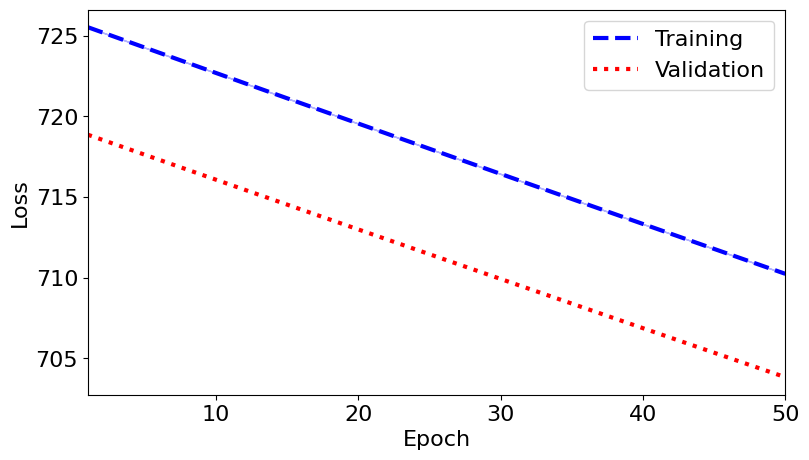

for learning rate : 0.0005

Train R^2: -0.869, Val  R^2: -0.835
Train MSE: 651.592, Val MSE: 646.145
Train MAE: 18.472, Val MAE: 18.237


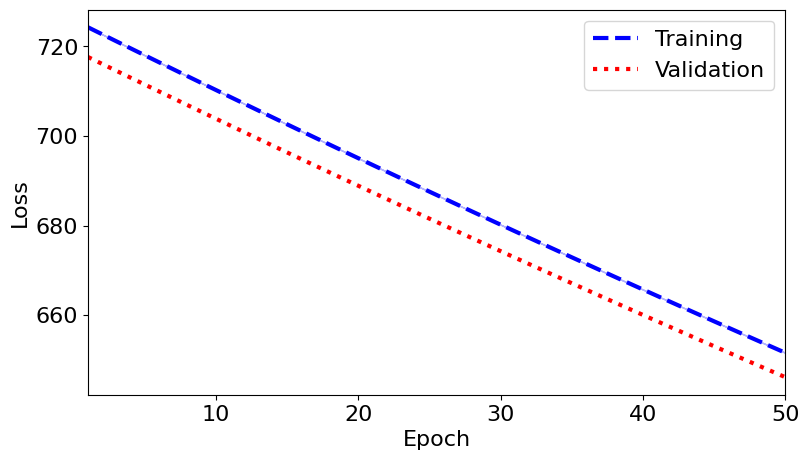

for learning rate : 0.001

Train R^2: -0.681, Val  R^2: -0.652
Train MSE: 585.958, Val MSE: 581.530
Train MAE: 17.572, Val MAE: 17.365


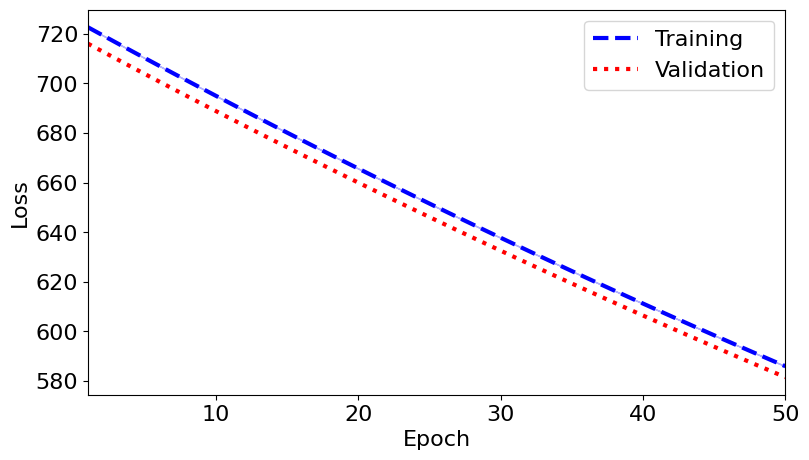

for learning rate : 0.005

Train R^2: 0.230, Val  R^2: 0.240
Train MSE: 268.231, Val MSE: 267.636
Train MAE: 11.956, Val MAE: 11.876


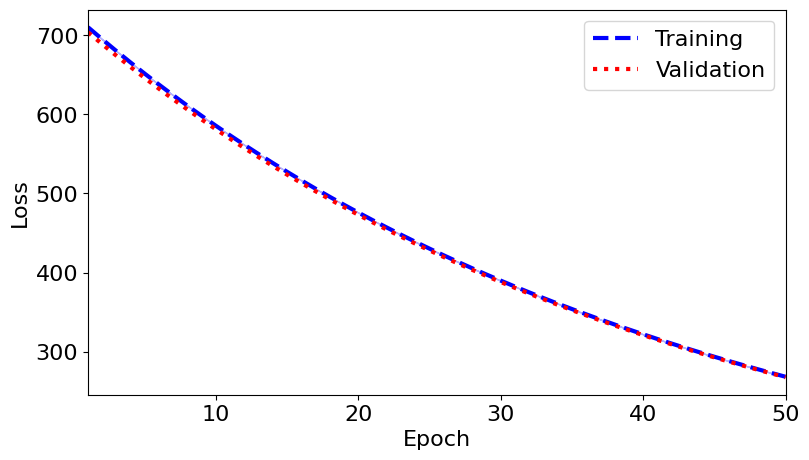

for learning rate : 0.01

Train R^2: 0.647, Val  R^2: 0.650
Train MSE: 123.085, Val MSE: 123.217
Train MAE: 7.886, Val MAE: 7.885


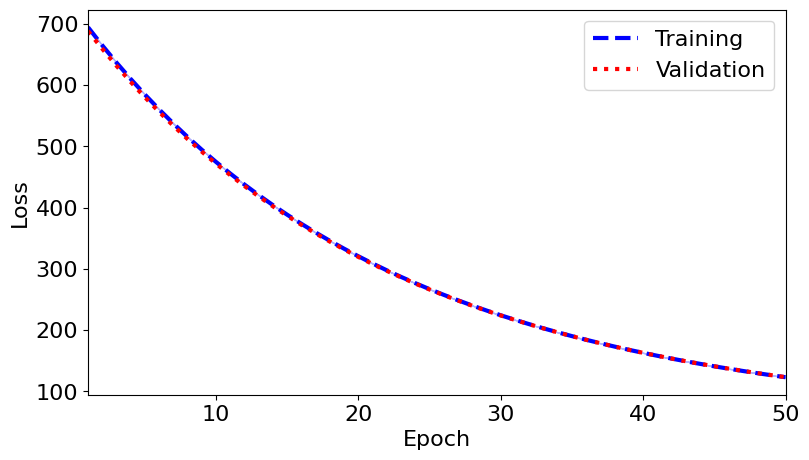

for learning rate : 0.05

Train R^2: 0.889, Val  R^2: 0.890
Train MSE: 38.521, Val MSE: 38.712
Train MAE: 3.546, Val MAE: 3.511


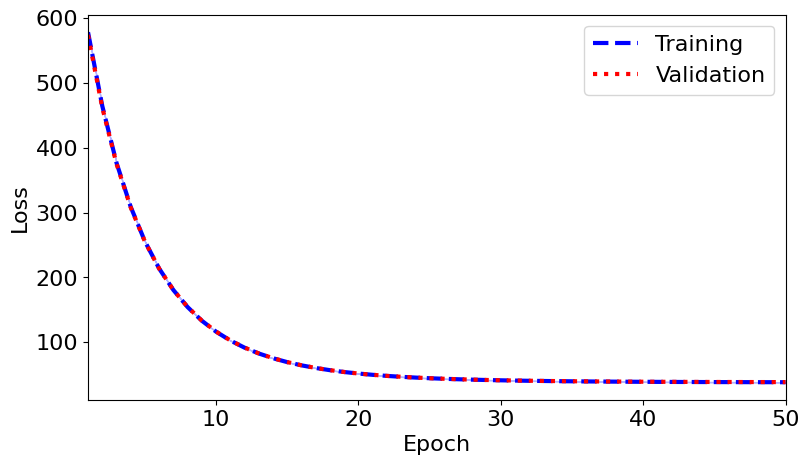

for learning rate : 0.1

Train R^2: 0.890, Val  R^2: 0.891
Train MSE: 38.228, Val MSE: 38.526
Train MAE: 3.495, Val MAE: 3.471


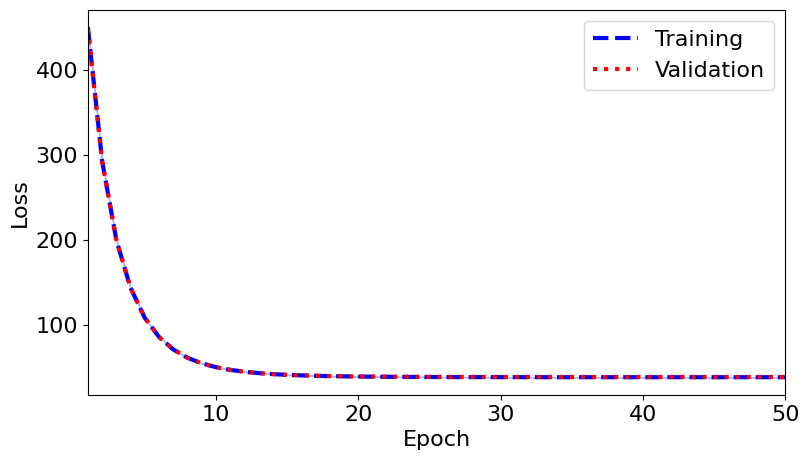

for batch size : 1
for learning rate : 1e-05

Train R^2: 0.890, Val  R^2: 0.891
Train MSE: 38.227, Val MSE: 38.537
Train MAE: 3.492, Val MAE: 3.469


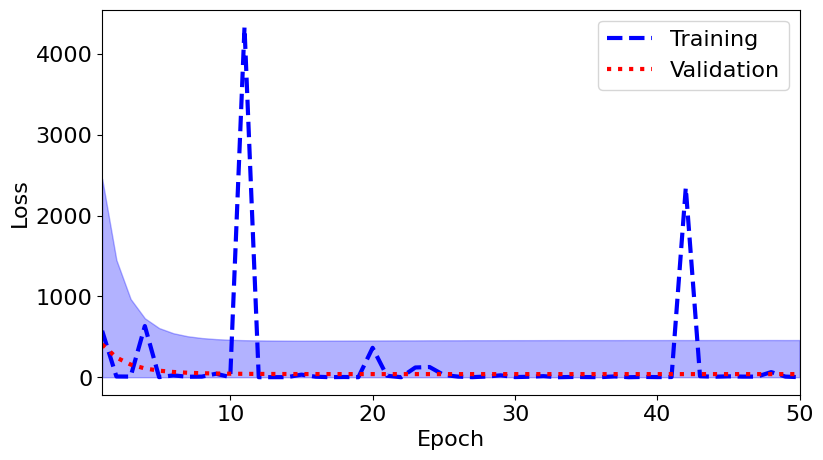

for learning rate : 5e-05

Train R^2: 0.890, Val  R^2: 0.890
Train MSE: 38.231, Val MSE: 38.553
Train MAE: 3.498, Val MAE: 3.476


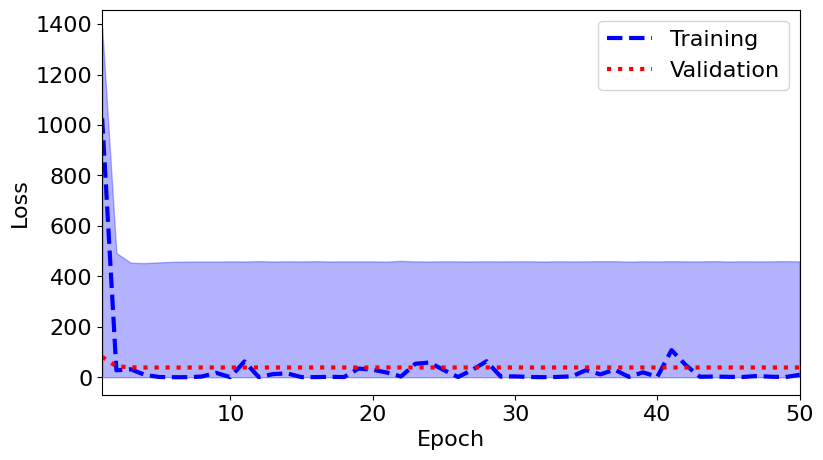

for learning rate : 0.0001

Train R^2: -597983002602586817890412704137478144.000, Val  R^2: -32404068304521177686452379582464.000
Train MSE: 208426274786891669340160969476124180480.000, Val MSE: 11407735113426833294011109879054336.000
Train MAE: 253631257184417984.000, Val MAE: 84971567686419360.000


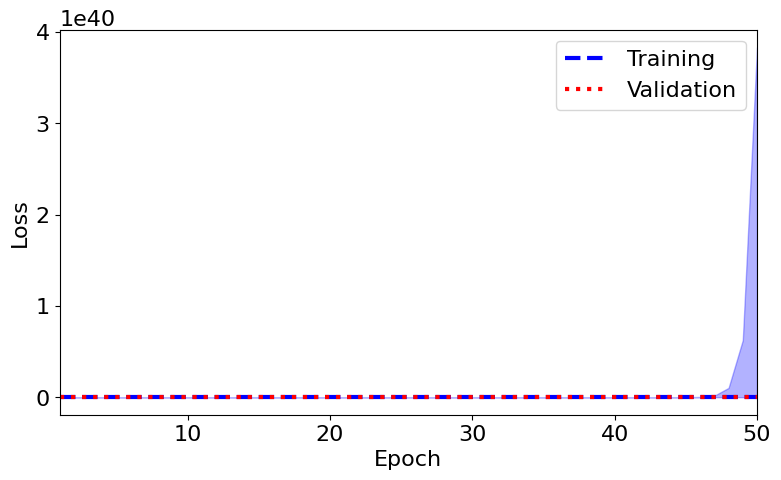

for learning rate : 0.0005

Train R^2: -4380841150845564613979976543518541579558367549410236361986770711913855089379841783002110398689228033565759423140331520.000, Val  R^2: -16556962949819806775851586734285183816549039366695497288917039626745047081918459383861020184123324989016761171968.000
Train MSE: 1526937049263731599970431480321115841035494946379614012428506440199482819415640700468331591673783056458328076027879751680.000, Val MSE: 5828818956908981100561848059135157967374846107953969601388383728776402165680292955571505682513792182100496008347648.000
Train MAE: 16760404197227496551483254363887312784686092763815384973312.000, Val MAE: 1927169954677065652026632664280417853960071061876684881920.000


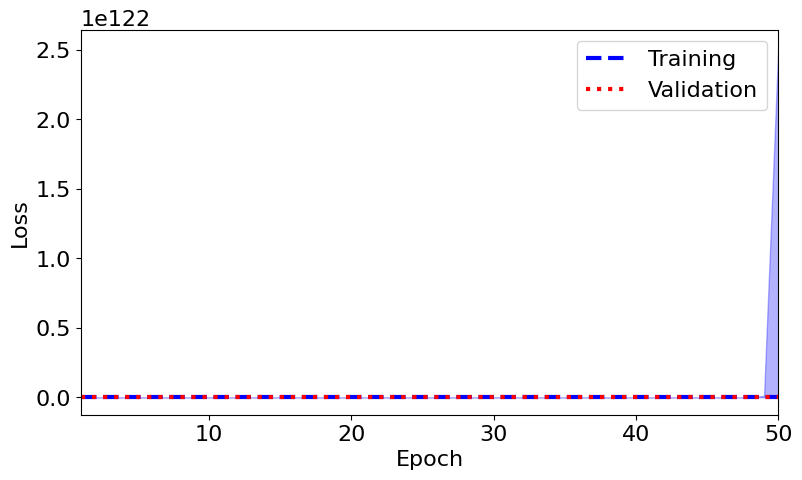

for learning rate : 0.001

Train R^2: -110969416158832574385163550049713524895875880409520309979351854564465433194330011150651573889721134732148623963172259850628258815577566382732175474688.000, Val  R^2: -77629825036543563871521554941553095293330524607771696492965328129962434886719114929625756984884447674629896453385323232510896666260434248007680.000
Train MSE: 38678259958223296721158877694656707891612854823616440308147879346249103712174285880907958671367014163550701798920902842000550852670580675018920929787904.000, Val MSE: 27329299290330125074578407503325225781187727432722343887239278528915173458265365312442638130274957996350318582051833594799719550240855401032581120.000
Train MAE: 78742820866515901904264161283595218374010398446036868987326480154294747136.000, Val MAE: 4120264440063128343228725207719001662812558687547434293717349478877364224.000


/Users/hansika/Documents/MLE/env/mle/lib/python3.9/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


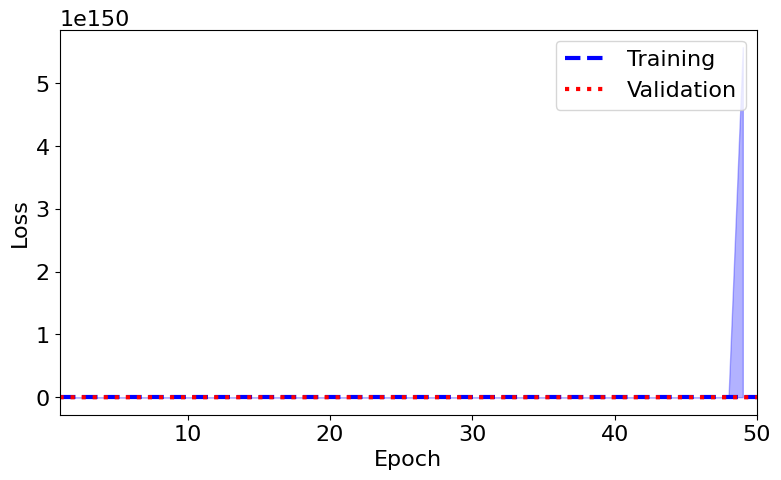

In [26]:
## This code is written for test bgd and sgd for different learning rates, and then to choose appropriate learning rate

def run_for_multiple_lr(batch_size, lr_values):
    print('for batch size :', batch_size)
    
    for lr in lr_values:
        print('for learning rate :', lr)
        lr_sched_fn = lambda i: constant_lr_schedule(lr, i)
        model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=batch_size, 
                                       verbose=False, verb_freq=np.maximum(1, 40000//batch_size))
        print()
        r2_mse_mae_eval(model_dc['theta'], train_x, train_y, val_x, val_y, predict_fn=predict_linear, pref='', verb=True)
        plot_gd_data(model_dc)

lr_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

# for batch gradient descent 
# lr_values = [0.001, 0.005, 0.01, 0.05, 0.1]
run_for_multiple_lr(train_y.shape[0], lr_values)

# for stochastic gradient descent
lr_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
run_for_multiple_lr(1, lr_values)

In [35]:
num_epochs = 50

X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]

model_fns_tup = (predict_linear, loss_mse, gradient_mse) 

sgd_lr = 0.00005
bgd_lr = 0.1
lr_relationship_with_batch_size = +1

"""Fill in your code
"""
# YOUR CODE HERE
print('for SGD:')
batch_size = 1
sgd_lr_sched_fn = lambda i: constant_lr_schedule(sgd_lr, i)
sgd_model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, sgd_lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=batch_size, 
                                       verbose=False, verb_freq=np.maximum(1, 40000//batch_size))
r2_mse_mae_eval(sgd_model_dc['theta'], train_x, train_y, val_x, val_y, predict_fn=predict_linear, pref='', verb=True)

print('for BGD:')
batch_size = train_y.shape[0]
bgd_lr_sched_fn = lambda i: constant_lr_schedule(bgd_lr, i)
bgd_model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, bgd_lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=batch_size, 
                                       verbose=False, verb_freq=np.maximum(1, 40000//batch_size))
r2_mse_mae_eval(bgd_model_dc['theta'], train_x, train_y, val_x, val_y, predict_fn=predict_linear, pref='', verb=True)
# raise NotImplementedError()

for SGD:
Train R^2: 0.890, Val  R^2: 0.890
Train MSE: 38.229, Val MSE: 38.551
Train MAE: 3.492, Val MAE: 3.470
for BGD:
Train R^2: 0.890, Val  R^2: 0.891
Train MSE: 38.228, Val MSE: 38.518
Train MAE: 3.495, Val MAE: 3.471


(0.8903218294109744,
 0.8905881354675662,
 38.22819782806472,
 38.518051410168084,
 3.4950090951462633,
 3.470919612200758)

In [36]:
""" [ASSERTS] Check 2c completed. """

assert var_exists('sgd_lr') and sgd_lr >= 0
assert var_exists('sgd_model_dc') and type(sgd_model_dc) == dict and sgd_model_dc['num_batches'] == train_x.shape[0] and sgd_model_dc['last_epoch'] == 49 
assert var_exists('bgd_lr') and bgd_lr >= 0
assert var_exists('bgd_model_dc') and type(bgd_model_dc) == dict and bgd_model_dc['num_batches'] == 1 and bgd_model_dc['last_epoch'] == 49 

assert var_exists('lr_relationship_with_batch_size') and lr_relationship_with_batch_size in [-1, 0, 1]


## [Task 2d] (5 points) Now go back to generic_partition_shuffle_sgd and implement gradient clipping by putting your code in the space provided. Ensure that when clip_gradient=True you normalize the gradient vector to have unit L2 norm. Now train the model again for 50 epochs with stochastic gradient descent (batch size = 1) but this time using random init and log1p_decay_lr_schedule. Tune the learning rate appropriately to ensure the training process is stable and the resulting model achieves similar performance as before. Set the 'clipped_grad_sgd_lr' variable to your chosen learning rate. 

In [37]:
num_epochs = 50
batch_size = 1

X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]

model_fns_tup = (predict_linear, loss_mse, gradient_mse) 

clipped_grad_sgd_lr = 0.1
init_params_fn = random_uniform_init

"""Fill in your code
"""
# YOUR CODE HERE

cliiped_lr_sched_fn = lambda i: log1p_decay_lr_schedule(clipped_grad_sgd_lr, i)

clipped_model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, random_uniform_init, cliiped_lr_sched_fn, val_data=(val_x_with_b, val_y),clip_gradient=True, num_epochs=50, batch_size=batch_size, 
                                       verbose=False, verb_freq=np.maximum(1, 40000//batch_size))
r2_mse_mae_eval(clipped_model_dc['theta'], train_x, train_y, val_x, val_y, predict_fn=predict_linear, pref='', verb=True)

# raise NotImplementedError()

Train R^2: 0.876, Val  R^2: 0.876
Train MSE: 43.095, Val MSE: 43.581
Train MAE: 3.144, Val MAE: 3.171


(0.8763589822322537,
 0.8762061781332062,
 43.094931849288265,
 43.581167502294505,
 3.1440645415397563,
 3.1707094427123415)

In [38]:
""" [ASSERTS] Check 2d completed. """

assert var_exists('clipped_grad_sgd_lr') and clipped_grad_sgd_lr >= 0
assert var_exists('clipped_model_dc') and type(clipped_model_dc) == dict and clipped_model_dc['num_batches'] == train_x.shape[0] and clipped_model_dc['last_epoch'] == 49 


---
# [Task 3] (25 points) A Linear Regression Model with Pseudo-Huber Loss?
## In this task you will do gradient descent with a regularized Pseudo-Huber loss. Before proceeding with the implementation you may want to read up on the Huber loss and the Pseudo-Huber loss.
## For our purposes the Pseudo-Huber loss is given by: $$L_{\bf \theta}({\bf{x}},{\bf{y}}) = \delta^2 \sqrt{1 + \frac{1}{\delta^2}({\bf y - \theta \cdot x})^2} - \delta^2 \ ,$$ where $\delta > 0$ is a constant.

## [Task 3a] (10 points) First implement the pseudo-huber loss in loss_pseudohuber(). The function should return the loss value averaged across all examples. Then spend time to figure out the gradient of the loss with respect to theta. Once you have it, implement it in gradient_pseudohuber(). Here again the gradient should be computed as the average across all examples. For now you should ignore the argument 'reg_fn' which can be used to add a regularization penalty (as this functionality is already implemented in gradient_pseudohuber()). 
### *[Important]* Your implementation must calculate the gradient vector manually, you should *not* use automatic differentiation such as provided by Tensorflow / GradientTape.

In [136]:
"""Fill in your code here.
"""
def loss_pseudohuber(theta, X, y, delta):
    (n, m) = X.shape
    y = y.reshape(-1,1)
    assert y.shape == (n,1)
    assert theta.shape == (m,1)

    ### Calculate loss_val for the pseudo-huber loss (scalar)
    # YOUR CODE HERE
    error = y - X.dot(theta)
    loss_val = np.mean(delta**2 * (np.sqrt(1 + (error / delta)**2) - 1))
    #raise NotImplementedError()
    
    assert loss_val.shape == ()
    return loss_val


def gradient_pseudohuber(theta, X, y, delta, reg_fn=None):
    (n, m) = X.shape
    
    y = y.reshape(-1,1)
    assert y.shape == (n,1)
    assert theta.shape == (m,1)
    
    ### Figure out the gradient for pseudo-huber loss  and implement this function 
    ### Compute 'gradient_vec' for the sseudo-huber loss ((m,1) vector) 
    ###* put your code here (~3-5 lines) *###
    # YOUR CODE HERE

    error = y - X.dot(theta)
    scaling_factors = error / np.mean( np.sqrt(1 + (error / delta)**2), axis=0)
    gradient_vec = -(X.T.dot(scaling_factors)).reshape(-1,1)

    #raise NotImplementedError()

    if reg_fn != None:
        reg_grad = reg_fn(theta)
        assert gradient_vec.shape == reg_grad.shape
        gradient_vec += reg_grad

    return gradient_vec

In [134]:
""" [ASSERTS] Check 3a completed. """

assert var_exists('loss_pseudohuber')
assert var_exists('gradient_pseudohuber')

tmp_X_ = np.random.randint(low=1, high=10, size=(7,5))
tmp_y_ = np.ones((7,1)) * 1
tmp_theta_ = np.zeros((5,1))

pseudohuber_delta = 0.05

tmp_loss_val_ = loss_pseudohuber(tmp_theta_, tmp_X_, tmp_y_, pseudohuber_delta)
tmp_loss_val_mse_ = loss_mse(tmp_theta_, tmp_X_, tmp_y_)
assert tmp_loss_val_ >= 0 and tmp_loss_val_ < tmp_loss_val_mse_ and tmp_loss_val_  < pseudohuber_delta + epsf 

pseudohuber_delta = 1.0
tmp_y_ = np.ones((7,1)) * 0.1
tmp_loss_val_mse_ = loss_mse(tmp_theta_, tmp_X_, tmp_y_)
tmp_loss_val_ = loss_pseudohuber(tmp_theta_, tmp_X_, tmp_y_, pseudohuber_delta)
assert tmp_loss_val_ >= 0 and tmp_loss_val_ < tmp_loss_val_mse_

tmp_gv_ = gradient_pseudohuber(tmp_theta_, tmp_X_, tmp_y_, pseudohuber_delta)
print(tmp_gv_.shape, tmp_theta_.shape)
assert tmp_gv_.shape == tmp_theta_.shape and np.all(tmp_gv_ < 0)

tmp_gv_mse_ = gradient_mse(tmp_theta_, tmp_X_, tmp_y_)
print(tmp_gv_mse_.shape, tmp_theta_.shape)


(5, 1) (5, 1)
(5, 1) (5, 1)


### The following can be used to test your implementation of the pseudo-huber loss and gradient. (You do not need to modify it.) Training should converge to a model comparable in performance to the previous ones.

In [137]:
X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]

delta = 0.25

loss_ph = lambda _t, _x, _y: loss_pseudohuber(_t, _x, _y, delta)
grph = lambda _t, _x, _y: gradient_pseudohuber(_t, _x, _y, delta, None)

# set our functions
model_fns_tup = (predict_linear, loss_ph, grph)
init_params_fn = random_uniform_init

learning_rate = 0.002 
lr_sched_fn = lambda i: log1p_decay_lr_schedule(learning_rate, i)

# run the gradient descent and store the result
model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=1000, 
                               clip_gradient=False, verbose=True, verb_freq=np.maximum(1, 100000//batch_size))

print()
_ = r2_mse_mae_eval(model_dc['theta'], train_x, train_y, val_x, val_y)

[Iter 0 (epoch 0)] train loss: 4.76, lr: 0.002000000, theta diff (l2-norm): 0.764254904.
[Iter 100 (epoch 7)] train loss: 2.80, lr: 0.000649468, theta diff (l2-norm): 0.131556876.
[Iter 200 (epoch 14)] train loss: 1.83, lr: 0.000539367, theta diff (l2-norm): 0.024944765.
[Iter 300 (epoch 21)] train loss: 1.35, lr: 0.000488873, theta diff (l2-norm): 0.038409897.
[Iter 400 (epoch 28)] train loss: 1.08, lr: 0.000457949, theta diff (l2-norm): 0.051619208.
[Iter 500 (epoch 35)] train loss: 0.98, lr: 0.000436346, theta diff (l2-norm): 0.025561491.
[Iter 600 (epoch 42)] train loss: 0.89, lr: 0.000420062, theta diff (l2-norm): 0.023245449.

Train R^2: 0.890, Val  R^2: 0.891
Train MSE: 38.227, Val MSE: 38.542
Train MAE: 3.490, Val MAE: 3.468


## [Task 3b] (10 points) Now you will implement L2 regularization and use it to train a model with the pseudo-huber loss. Fill in the code in l2_regularize() to regularize 'w' (but not the bias/intercept 'b').

In [138]:
"""Fill in your code (~1-2 lines). This function will return the gradient of the L2 regularization term with regularization strength given by 'lmbda'.
"""
def l2_regularize(theta, lmbda):
    assert lmbda >= 0.0
    
    ### Note 1: use 'lmbda' (lambda) -- the regularization hyperparameter.
    ### Note 2: we do not regularize the bias/intercept b
    # YOUR CODE HERE
    reg_grad = np.zeros_like(theta)
    reg_grad[1:] = lmbda * theta[1:]
    # raise NotImplementedError()
    assert reg_grad.shape == theta.shape
    
    return reg_grad

In [124]:
""" [ASSERTS] Check 3b completed. """

assert var_exists('l2_regularize')

tmp_theta_ = np.zeros((5,1))
assert np.all(np.abs(l2_regularize(tmp_theta_, 1.0)) < epsf)

tmp_theta_ = np.ones((5,1))
assert np.sum(np.abs(l2_regularize(tmp_theta_, 1.0))) < np.sum(np.abs(l2_regularize(tmp_theta_, 2.0)))

tmp_theta1_ = np.ones((5,1))
tmp_theta2_ = np.ones((5,1)) * 2.0
assert np.sum(np.abs(l2_regularize(tmp_theta1_, 1.0))) < np.sum(np.abs(l2_regularize(tmp_theta2_, 1.0)))


## [Task 3c] (5 points) Train the model to convergence with various strengths of regularization and each time print the performance metrics and the L2 norm of the 'w' to show the effectiveness of regularization. Use the provided learning rate, schedule, param initialization, etc. Finally set the variable 'best_lmbda' to indicate which value of the regularization hyperparamneter lambda is the best.

In [142]:
X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]

delta = 0.25

loss_ph = lambda _t, _x, _y: loss_pseudohuber(_t, _x, _y, delta)
init_params_fn = random_uniform_init

learning_rate = 0.002 
lr_sched_fn = lambda i: log1p_decay_lr_schedule(learning_rate, i)

num_epochs = 50
batch_size = 1000

best_lmbda = None
best_performance = float('inf')

lmbdas = np.array([0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0])
for i, lmbda in enumerate(lmbdas):
    reg_fn = lambda _t: l2_regularize(_t, lmbda)
    # YOUR CODE HERE

    grph = lambda _t, _x, _y: gradient_pseudohuber(_t, _x, _y, delta, reg_fn)
    model_fns_tup = (predict_linear, loss_ph, grph)
    
    model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=1000, 
                               clip_gradient=False, verbose=True, verb_freq=np.maximum(1, 100000//batch_size))
    theta = model_dc['theta']
    l2norm_w = np.linalg.norm(theta[1:], ord=2)
    
    #raise NotImplementedError()
    
    print('[i: {}] -- Lambda: {:.3f}, L2-norm of w: {:.3f}'.format(i, lmbda, l2norm_w))
    performance_metrics = r2_mse_mae_eval(model_dc['theta'], train_x, train_y, val_x, val_y)
    print()

    # YOUR CODE HERE
    val_mse = performance_metrics[3]
    if val_mse < best_performance:
        best_performance = val_mse
        best_lmbda = lmbda
print('Best Lambda: {:.3f}'.format(best_lmbda))
    #raise NotImplementedError()

[Iter 0 (epoch 0)] train loss: 4.72, lr: 0.002000000, theta diff (l2-norm): 0.689587972.
[Iter 100 (epoch 7)] train loss: 2.79, lr: 0.000649468, theta diff (l2-norm): 0.148214591.
[Iter 200 (epoch 14)] train loss: 1.81, lr: 0.000539367, theta diff (l2-norm): 0.066977241.
[Iter 300 (epoch 21)] train loss: 1.31, lr: 0.000488873, theta diff (l2-norm): 0.037789894.
[Iter 400 (epoch 28)] train loss: 1.06, lr: 0.000457949, theta diff (l2-norm): 0.037299697.
[Iter 500 (epoch 35)] train loss: 0.96, lr: 0.000436346, theta diff (l2-norm): 0.039130936.
[Iter 600 (epoch 42)] train loss: 0.91, lr: 0.000420062, theta diff (l2-norm): 0.020164891.
[i: 0] -- Lambda: 0.000, L2-norm of w: 17.066
Train R^2: 0.890, Val  R^2: 0.890
Train MSE: 38.227, Val MSE: 38.550
Train MAE: 3.488, Val MAE: 3.466

[Iter 0 (epoch 0)] train loss: 4.39, lr: 0.002000000, theta diff (l2-norm): 0.751661760.
[Iter 100 (epoch 7)] train loss: 2.61, lr: 0.000649468, theta diff (l2-norm): 0.129756392.
[Iter 200 (epoch 14)] train los

In [66]:
""" [ASSERTS] Check 3c completed. """

assert var_exists('lmbdas') and np.array_equal(lmbdas, np.array([0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]))
assert var_exists('best_lmbda') and best_lmbda != None and best_lmbda >= 0 and best_lmbda < +np.inf and best_lmbda in lmbdas


---
# [Task 4] (20 points) PCA
## In this task you will use PCA for dimensionality reduction.

## [Task 4a] (10 points) Use PCA to transform both the unscaled ('all_x') and scaled ('scaled_all_x') features. In each case you should reduce the dimensionality to keep only k principal components where k is the *smallest positive* integer that captures at least 90% of the variance. After you transform the data ('all_x_transf' and 'scaled_all_x_transf') be sure to set the variables 'k_90perc_unscaled' and 'k_90perc_scaled'.

In [72]:
from sklearn.decomposition import PCA

# YOUR CODE HERE

def compute_pca(X, variance_threshold=0.9):
    pca = PCA()
    pca.fit(X)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    k = np.argmax(cumulative_variance >= variance_threshold) + 1
    return pca, k

# For unscaled data
pca_unscaled, k_90perc_unscaled = compute_pca(all_x)
all_x_transf = pca_unscaled.transform(all_x)

pca_scaled, k_90perc_scaled = compute_pca(scaled_all_x)
scaled_all_x_transf = pca_scaled.transform(scaled_all_x)

print(k_90perc_unscaled, k_90perc_scaled)
# raise NotImplementedError()

1 12


In [ ]:
""" [ASSERTS] Check 4a completed. """

assert var_exists('k_90perc_unscaled') and k_90perc_unscaled >= 1 and k_90perc_unscaled <= all_x.shape[1]
assert var_exists('k_90perc_scaled') and k_90perc_scaled >= 1 and k_90perc_scaled <= all_x.shape[1]
assert var_exists('all_x_transf') and all_x_transf.shape == (all_x.shape[0],k_90perc_unscaled) 
assert var_exists('scaled_all_x_transf') and scaled_all_x_transf.shape == (all_x.shape[0],k_90perc_scaled) 


## [Task 4b] (5 points) Given this, what do you conclude about features scaling when applying PCA. Justify your answer. (If it helps you can try to train a model on the projected features.)

In [73]:
""" Remove the 'raise NotImplementedError' line(s). Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"""
# 
## Answer: We need to do feature scaling before applying PCA. This leads to a more balanced representation of the data's distribution/structure, where all features have an equal opportunity to contribute to the principal components. More specifically, it allows features with minor variance (which might contain important information) to contribute more equally. 
#
# YOUR CODE HERE
# raise NotImplementedError()

" Remove the 'raise NotImplementedError' line(s). Write your answer as a comment in the place provided.  (Do not change the cell type from code to markdown.)"

---
# [Task 5] \<*For CAI6108MLE Only*\> (25 points) Least Absolute Deviation. For this task you will use automatic differentiation through Tensorflow's GradientTape to implement LAD regression.

## [Task 5a] (25 points) First implement the LAD loss (mean absolute error) in loss_lad(). The function should return the loss value averaged across all examples. Then use GradientTape to implement the LAD loss in gradient_lad(). 

In [ ]:
# Note: do *not* import or use tensorflow before this point (i.e., before task 5) or automated tests will fail causing you to lose points!
import tensorflow as tf 

"""Fill in your code here.
"""
def loss_lad(theta, X, y):
    (n, m) = X.shape
    y = y.reshape(-1,1)
    assert y.shape == (n,1)
    assert theta.shape == (m,1)

    # YOUR CODE HERE
    raise NotImplementedError()
    
    assert loss_val.shape == ()
    return loss_val


def gradient_lad(theta, X, y):
    (n, m) = X.shape
    
    y = y.reshape(-1,1)
    assert y.shape == (n,1)
    assert theta.shape == (m,1)
    
    # first let's create a tensor for theta
    theta_tensor = tf.Variable(theta, name='theta')

    ### Use GradientTape to compute the gradient. Hint: use tf.reduce_mean().
    ###* put your code here (~3-5 lines) *###
    # YOUR CODE HERE
    raise NotImplementedError()
    
    assert isinstance(gradient_vec, tf.Tensor)
    gradient_vec = gradient_vec.numpy()
    return gradient_vec

In [ ]:
""" [ASSERTS] Check 5a completed. """

X_with_b = np.c_[np.ones((train_x.shape[0],1)), train_x]
val_x_with_b = np.c_[np.ones((val_x.shape[0],1)), val_x]


# set our functions
model_fns_tup = (predict_linear, loss_lad, gradient_lad)
init_params_fn = random_uniform_init

learning_rate = 0.8
lr_sched_fn = lambda i: log1p_decay_lr_schedule(learning_rate, i)

# run the gradient descent and store the result
model_dc = generic_partition_shuffle_sgd(X_with_b, train_y, model_fns_tup, init_params_fn, lr_sched_fn, val_data=(val_x_with_b, val_y), num_epochs=50, batch_size=1000, 
                               clip_gradient=True, verbose=True, verb_freq=np.maximum(1, 100000//batch_size))

print()
_ = r2_mse_mae_eval(model_dc['theta'], train_x, train_y, val_x, val_y)